# Task

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('./datasets/kaggle_survey_2022_responses.csv', low_memory=False)
data.drop(0, inplace = True) # Удаление вопросиков
name2question = data.iloc[0] 

## Task 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

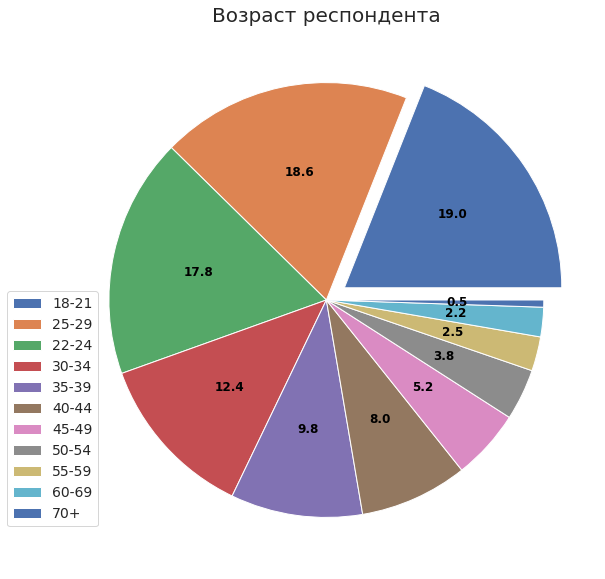

In [13]:
q2_counts = data['Q2'].value_counts()
data_for_age = pd.DataFrame({'Возраст': q2_counts.index, 'Количество': q2_counts.values})

explode = (0.1, 0, 0, 0, 0, 0 , 0, 0, 0 ,0 , 0)

fig, ax = plt.subplots(figsize = (10,10))
wedges, texts, autotexts = ax.pie(data_for_age['Количество'], explode=explode, labels = None, autopct='%1.1f', textprops = {'color':'black'})
ax.set_title("Возраст респондента", fontsize = 20)
ax.legend(data_for_age['Возраст'],title = None, loc = 'center left', bbox_to_anchor = (-0.1, 0.3), fontsize = 14)
plt.setp(autotexts, size = 12, weight = 'bold')

plt.show()

## Task 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации.

In [14]:
import seaborn as sns

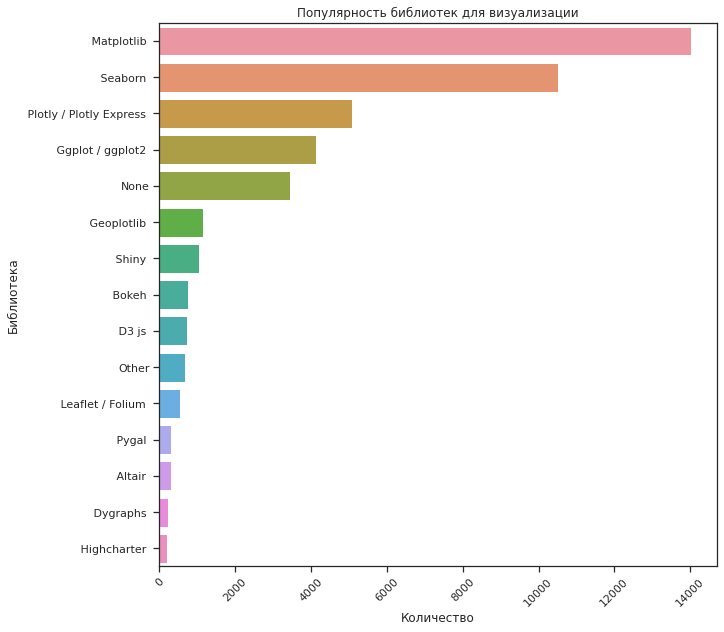

In [15]:
q15_columns = [col for col in data.columns if col.startswith('Q15')]
vis_libs = data[q15_columns].melt(var_name = 'question', value_vars = q15_columns)
q15_counts = vis_libs['value'].value_counts()
data_for_vis_lib = pd.DataFrame({'Библиотека': q15_counts.index, 'Количество': q15_counts.values})

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x = data_for_vis_lib['Количество'], y = 'Библиотека', data = data_for_vis_lib)
ax.tick_params('x', labelrotation=45)
plt.title('Популярность библиотек для визуализации')
plt.show()


## Task 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям.

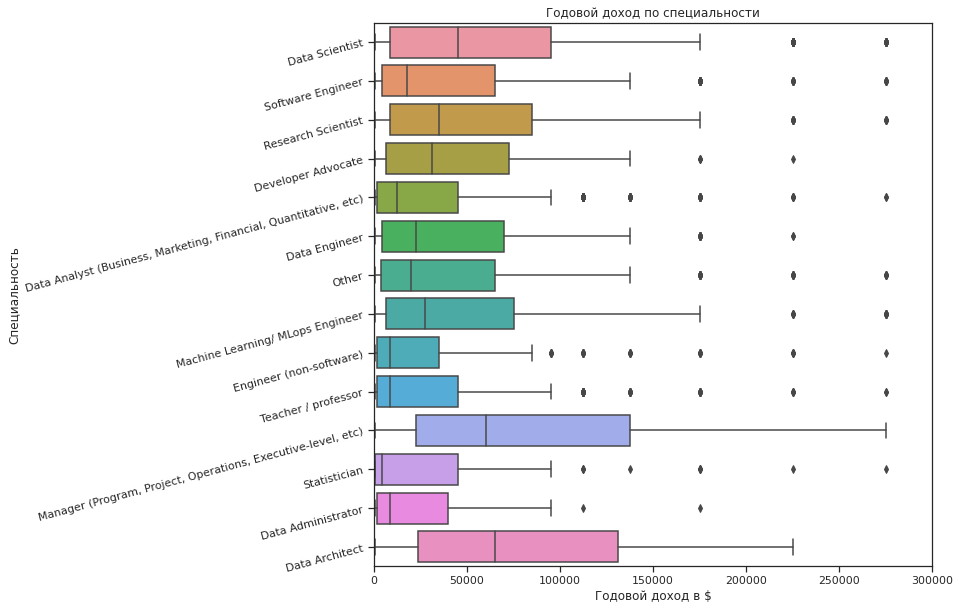

In [16]:
 avg_salary = {
    '$0-999': 500,'1,000-1,999': 1500, '2,000-2,999': 2500, '3,000-3,999': 3500, '4,000-4,999': 4500, '5,000-7,499': 6250, '7,500-9,999': 8750, '10,000-14,999': 12500, '15,000-19,999': 17500, '20,000-24,999': 22500, '25,000-29,999': 27500, '30,000-39,999': 35000, '40,000-49,999': 45000, '50,000-59,999': 55000, '60,000-69,999': 65000, '70,000-79,999': 75000, '80,000-89,999': 85000, '90,000-99,999': 95000, '100,000-124,999': 112500, '125,000-149,999': 137500, '150,000-199,999': 175000, '200,000-249,999': 225000, '250,000-299,999': 275000, '300,000-499,999': 400000, '$500,000-999,999': 750000, '>$1,000,000': 1000000
}
data['Q29-NEW'] = data['Q29'].map(avg_salary) #Интеграция средних  в датафрейм
profs = data[(data['Q23'] != 'Currently not employed') & (data['Q29-NEW'])]

sns.set_theme(style = 'ticks')
fig, ax = plt.subplots(figsize = (10,10))
ax.tick_params('y', labelrotation=15)
sns.boxplot(x = 'Q29-NEW', y = 'Q23', data = profs)
ax.set_xlabel('Годовой доход в $')
ax.set_ylabel('Специальность')
# ax.set_xticks([0, 50000, 100000, 150000, 200000, 250000, 300000])
plt.title('Годовой доход по специальности')
ax.set_xlim(0, 300000)
plt.show()

## Task 4
Используя библиотеку plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по
специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect

In [17]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import kaleido

In [18]:
t4 = data[
    ((data['Q23'] == 'Data Administrator') |
    (data['Q23'] == 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)') |
    (data['Q23'] == 'Data Engineer') |
    (data['Q23'] == 'Data Scientist') |
    (data['Q23'] == 'Engineer (non-software)') |
    (data['Q23'] == 'Machine Learning/ MLops Engineer') |
    (data['Q23'] == 'Research Scientist') |
    (data['Q23'] == 'Software Engineer') |
    (data['Q23'] == 'Data Architect')) & data['Q2']
]
df_spec_1 = t4[['Q23', 'Q2']].value_counts().reset_index()
df_spec_1.columns = ['Q23', 'Q2', 'value_counts']
df_spec = df_spec_1.sort_values(by = 'Q2')

df_pro = df_spec['Q23'].unique()
df_pro[3] = 'Engineer'
df_pro[4] = 'MLops Engineer'
df_pro[5] = 'Data Analyst'

formatted_values = df_pro.tolist()
formatted_values = list(map(lambda x: f'<b><i>{x}</i></b>', formatted_values))

fig = make_subplots(rows = 3, cols = 3, shared_xaxes = False, shared_yaxes = False, subplot_titles = formatted_values)

colors = px.colors.qualitative.Pastel

for i, q23 in enumerate(df_spec['Q23'].unique()):
    set = df_spec[df_spec['Q23'] == q23]
    row = i//3 +1
    col = i%3 + 1
    fig.add_trace(go.Bar(x = set['Q2'], y = set['value_counts'], name = q23, marker_color = colors[i]), row = row, col = col)

fig.update_layout(height = 600, width = 1200, title_text = "<i>Распределение возрастов по специальности</i>")
# fig.write_image("../misc/images/t4.svg")
fig.show()


## Task 5

Используя библиотеку plotly, построй карту стран респондентов. В этом тебе поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/)

In [19]:
df_country = data['Q4'].value_counts().reset_index()
df_country.columns = ['Q4','value_counts']
df_t = px.data.gapminder().query("year == 2007")
fig = px.choropleth(df_country,  locations = 'Q4',
                    color = 'value_counts',
                    hover_name = 'Q4',
                    locationmode='country names',
                    range_color=[0,1000],
                    title= 'Карта Мира')
fig.update_layout(
    coloraxis_colorbar = dict(
        y = 0.5,
        x = 0.72,
        len = 1.74,
        title = 'Количество респондентов',
        ticks = 'outside',
        ticklen = 10,
        thickness = 25,
        # tickcolor = 'white',
        dtick = 200,
        showticklabels = True
    ),
    title = dict(
        y = 1,
        x = 0.5
    )
)
fig.show()